In [13]:
# Importing other necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow import keras

from datetime import datetime
import os

import visualkeras
from PIL import ImageFont



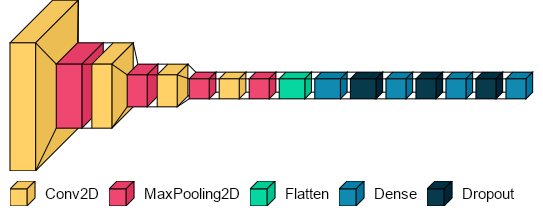

In [14]:
##############################################################################################
"""
Remarks: 
1. Put this train script outside a train folder, inside train folder there should be test_data, train_data.
         
2. Specify the model_name. The weights and logs folder will be saved inside trainfolder->model_name

3. Select GPU, 0 or 1
         
"""
# Specify the paths
##############################################################################################
model = tf.keras.models.Sequential([
            #Convolution Block
            tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', input_shape = (32, 32, 3), padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),

            #Flatten
            tf.keras.layers.Flatten(),
            
            #Fully Connected Layer
            tf.keras.layers.Dense(256, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4, activation='softmax')
        ])

font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!

visualkeras.layered_view(model, legend=True, draw_volume=True, font=font, spacing=10)  # font is optional!